### Churn Prediction Process

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install shap
!pip install joblib

You should consider upgrading via the '/Users/nguyenphutrieu/Documents/Code/DataScience/.env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/nguyenphutrieu/Documents/Code/DataScience/.env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/nguyenphutrieu/Documents/Code/DataScience/.env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/nguyenphutrieu/Documents/Code/DataScience/.env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/nguyenphutrieu/Documents/Code/DataScience/.env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/nguyenphutrieu/Documents/Code/DataScience/.env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/nguyenphutrieu/Documents/Code/DataScience/.env/bin/python3 -m pip install --upgrade pip' c

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
import shap


/Users/nguyenphutrieu/Documents/Code/DataScience/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Step 1: Data exploration and preprocessing

In [3]:
# Load data
file_path = 'churn.csv'
data = pd.read_csv(file_path)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Data overview
print("Data Information:")
print(data.info())
print("\nData Description:")
print(data.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Data Description:
         RowNumber    CustomerId   CreditScore      


Generating Histograms for Continuous Variables...


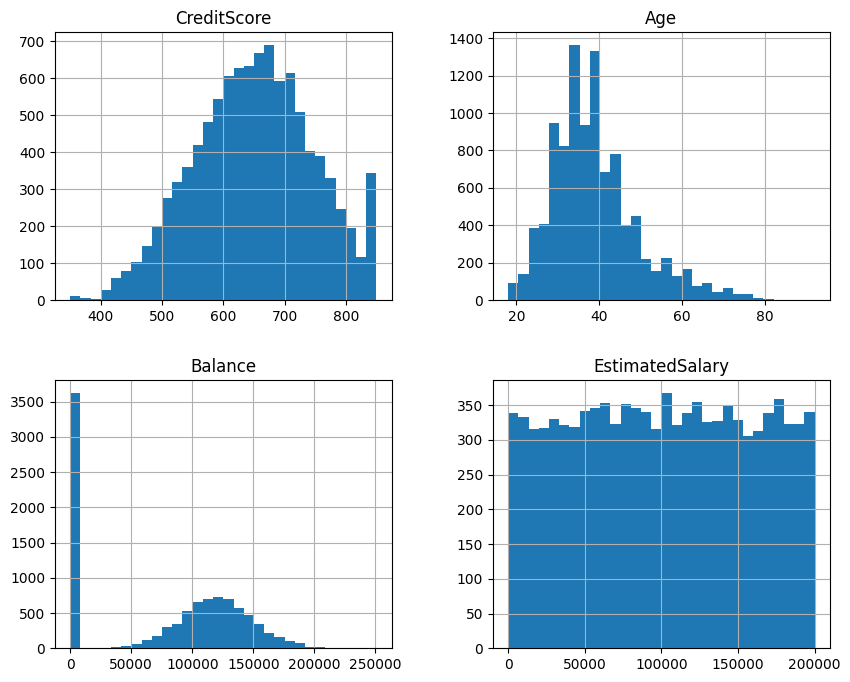

In [5]:
# Histograms for continuous variables
print("\nGenerating Histograms for Continuous Variables...")
data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].hist(bins=30, figsize=(10, 8))
plt.show()



Generating Bar Charts for Categorical Variables...


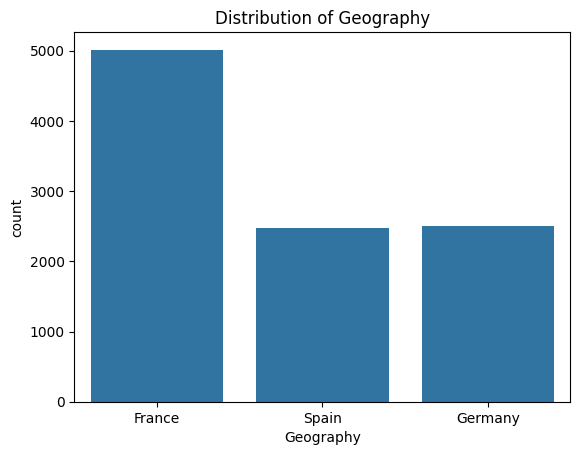

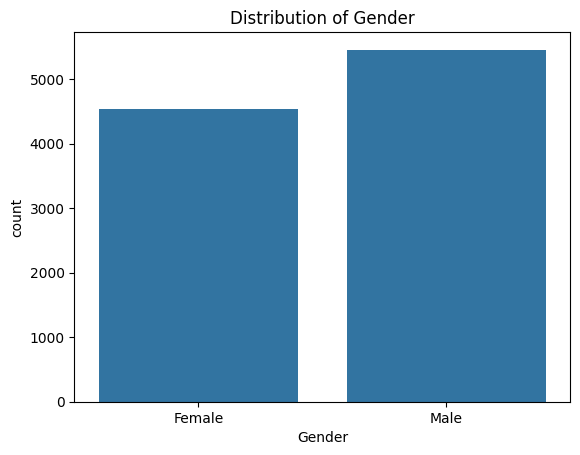

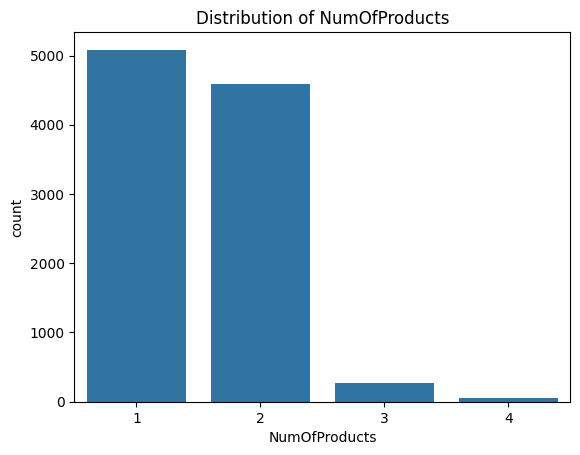

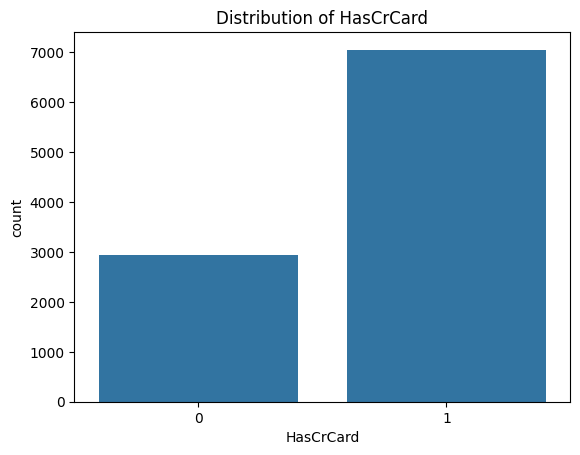

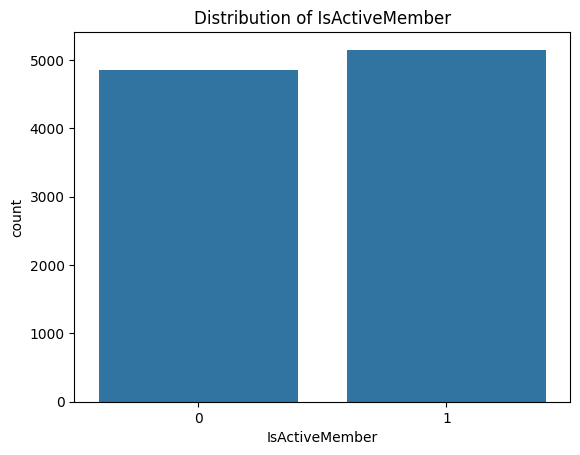

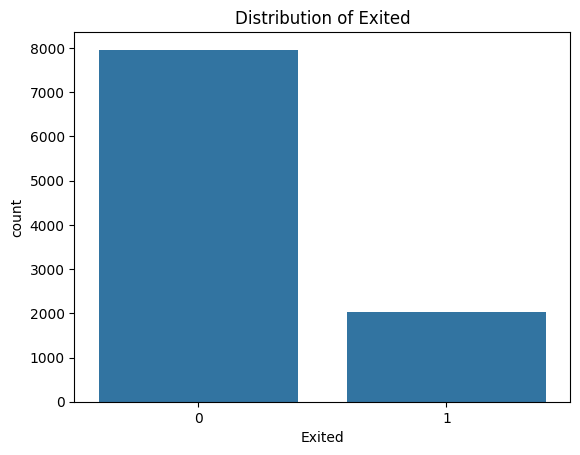

In [6]:
# Bar charts for categorical variables
print("\nGenerating Bar Charts for Categorical Variables...")
categorical_columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_columns:
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


In [7]:
# Drop unnecessary columns
print("\nDropping unnecessary columns...")
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


Dropping unnecessary columns...


In [8]:
# One-Hot Encoding for Geography
print("\nApplying One-Hot Encoding for Geography...")
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)


Applying One-Hot Encoding for Geography...


In [9]:
# Label Encoding for Gender
print("\nApplying Label Encoding for Gender...")
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male -> 1, Female -> 0



Applying Label Encoding for Gender...


In [10]:
# Standardize continuous variables
print("\nStandardizing continuous variables...")
scaler = StandardScaler()
data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])



Standardizing continuous variables...


In [11]:
# Check the processed data
print("\nProcessed Data (First 5 Rows):")
print(data.head())



Processed Data (First 5 Rows):
   CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221       0  0.293517       2 -1.225848              1          1   
1    -0.440036       0  0.198164       1  0.117350              1          0   
2    -1.536794       0  0.293517       8  1.333053              3          1   
3     0.501521       0  0.007457       1 -1.225848              2          0   
4     2.063884       0  0.388871       2  0.785728              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1         0.021886       1              False            False  
1               1         0.216534       0              False             True  
2               0         0.240687       1              False            False  
3               0        -0.108918       0              False            False  
4               1        -0.365276       0              False             True  


### Step 2: Data Splitting

In [12]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [13]:
# Split the data: 60% train, 20% validation, 20% test
print("\nSplitting data into training, validation, and test sets...")
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



Splitting data into training, validation, and test sets...


In [14]:
# Print the shapes of each split
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Training set: (6000, 11)
Validation set: (2000, 11)
Test set: (2000, 11)


### Step 3: Model Building and Initial Training

In [15]:
# Logistic Regression
print("\nTraining Logistic Regression Model...")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_val_pred = log_reg.predict(X_val)
print("\nLogistic Regression Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))



Training Logistic Regression Model...

Logistic Regression Accuracy on Validation Set: 0.8165
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1620
           1       0.55      0.20      0.29       380

    accuracy                           0.82      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.82      0.78      2000



In [16]:
# Random Forest
print("\nTraining Random Forest Model...")
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)
y_val_pred_rf = rf.predict(X_val)
print("\nRandom Forest Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))



Training Random Forest Model...

Random Forest Accuracy on Validation Set: 0.8675
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1620
           1       0.78      0.43      0.55       380

    accuracy                           0.87      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.87      0.85      2000



In [17]:
# XGBoost
print("\nTraining XGBoost Model...")
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=10, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_val_pred_xgb = xgb.predict(X_val)
print("\nXGBoost Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred_xgb))
print(classification_report(y_val, y_val_pred_xgb))



Training XGBoost Model...


/Users/nguyenphutrieu/Documents/Code/DataScience/.env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:24:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy on Validation Set: 0.845
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1620
           1       0.63      0.45      0.52       380

    accuracy                           0.84      2000
   macro avg       0.75      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



### Step 4: Model Optimization with Grid Search

In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}


In [19]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='recall')


In [20]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [21]:
# Best parameters from Grid Search
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score from Grid Search:", grid_search.best_score_)


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Recall Score from Grid Search: 0.656917205906753


In [22]:
# Evaluate optimized Random Forest on Validation Set
y_val_pred_optimized = best_rf.predict(X_val)
print("\nOptimized Random Forest Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred_optimized))
print(classification_report(y_val, y_val_pred_optimized))



Optimized Random Forest Accuracy on Validation Set: 0.8285
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1620
           1       0.54      0.62      0.58       380

    accuracy                           0.83      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000



In [23]:
# Step 5: Handling Class Imbalance with SMOTE
# ===========================================
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [24]:
# Train balanced Random Forest with SMOTE data
rf_balanced = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, class_weight='balanced')
rf_balanced.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

In [25]:
# Evaluate balanced Random Forest on Validation Set
y_val_pred_rf_balanced = rf_balanced.predict(X_val)
print("\nRandom Forest with SMOTE Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred_rf_balanced))
print(classification_report(y_val, y_val_pred_rf_balanced))


Random Forest with SMOTE Accuracy on Validation Set: 0.8185
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1620
           1       0.52      0.61      0.56       380

    accuracy                           0.82      2000
   macro avg       0.71      0.74      0.72      2000
weighted avg       0.83      0.82      0.82      2000



In [26]:
# Step 6: Model Evaluation with ROC and Precision-Recall
# ======================================================
roc_auc = roc_auc_score(y_val, rf_balanced.predict_proba(X_val)[:, 1])
print("ROC-AUC Score for Balanced Random Forest on Validation Set:", roc_auc)


ROC-AUC Score for Balanced Random Forest on Validation Set: 0.8304743339831059


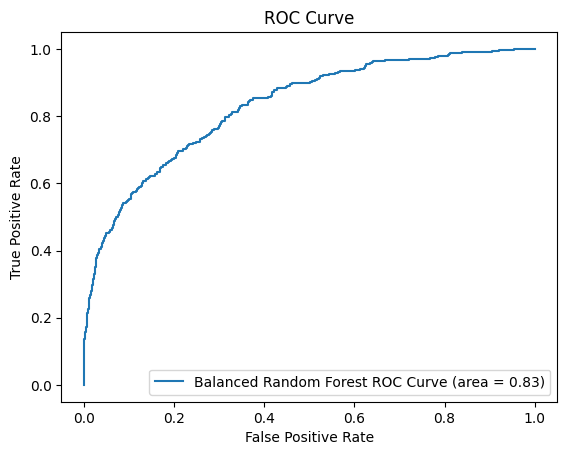

In [27]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_val, rf_balanced.predict_proba(X_val)[:, 1])
plt.plot(fpr, tpr, label="Balanced Random Forest ROC Curve (area = %0.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


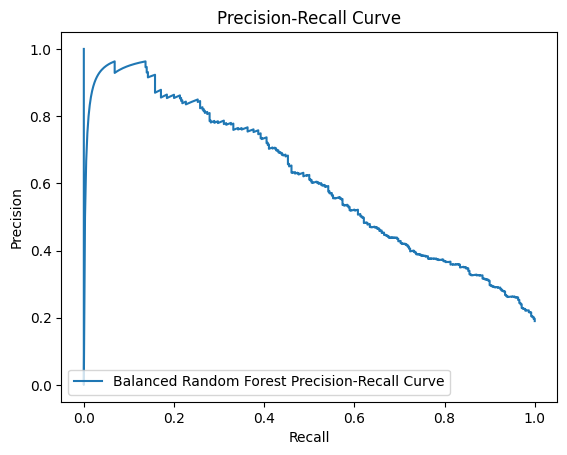

In [28]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, rf_balanced.predict_proba(X_val)[:, 1])
plt.plot(recall, precision, label="Balanced Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


### Step 7: Feature Importance and SHAP Analysis

In [29]:
# Feature Importance of Random Forest
print("\nAnalyzing Feature Importance with Random Forest...")
importances_rf = rf_balanced.feature_importances_
feature_names = X_train.columns
rf_importances = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)



Analyzing Feature Importance with Random Forest...


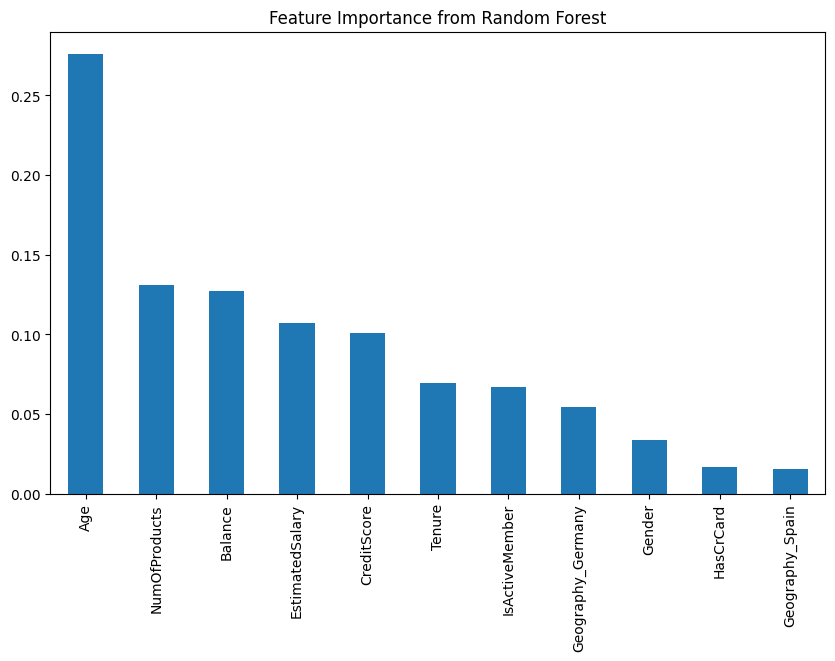

In [30]:
# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
rf_importances.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.show()



SHAP Analysis for XGBoost...


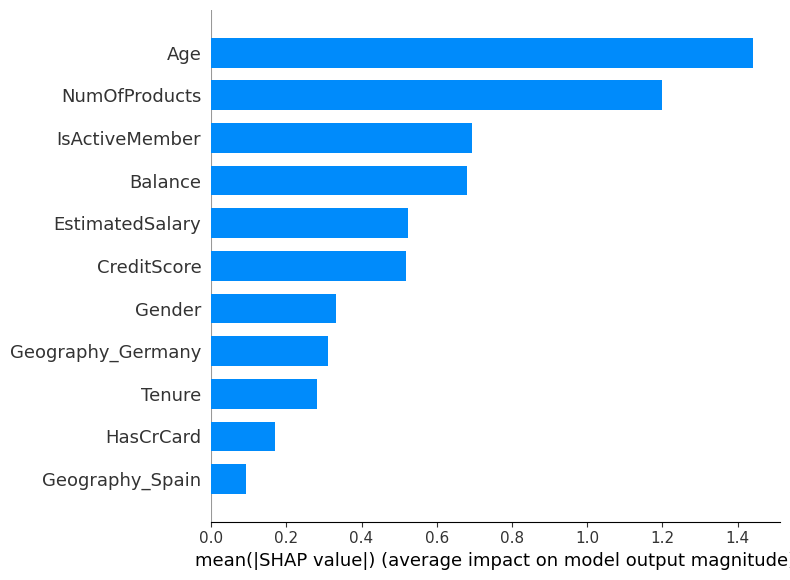

In [31]:
# SHAP Analysis for XGBoost
print("\nSHAP Analysis for XGBoost...")
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")


### Step 8: Customer Segmentation

In [32]:
# Predict churn risk probabilities on the test set
churn_risk_probs = rf_balanced.predict_proba(X_test)[:, 1]


In [33]:
# Add churn risk and segment customers
X_test = X_test.copy()  # Create a copy to avoid modifying the original data
X_test['ChurnRisk'] = churn_risk_probs
X_test['CustomerSegment'] = 'Unknown'


In [34]:
# Define thresholds for segmentation
high_value_threshold = X_test['Balance'].quantile(0.5)
high_risk_threshold = 0.5


In [35]:
# Assign segments
X_test.loc[(X_test['ChurnRisk'] < high_risk_threshold) & (X_test['Balance'] >= high_value_threshold), 'CustomerSegment'] = 'Maintain'
X_test.loc[(X_test['ChurnRisk'] < high_risk_threshold) & (X_test['Balance'] < high_value_threshold), 'CustomerSegment'] = 'Cultivate'
X_test.loc[(X_test['ChurnRisk'] >= high_risk_threshold) & (X_test['Balance'] < high_value_threshold), 'CustomerSegment'] = 'Divest'
X_test.loc[(X_test['ChurnRisk'] >= high_risk_threshold) & (X_test['Balance'] >= high_value_threshold), 'CustomerSegment'] = 'Aggressively Retain'

In [36]:
# Kiểm tra kết quả phân loại khách hàng
print("\nCustomer Segmentation (First 10 rows):")
print(X_test[['ChurnRisk', 'Balance', 'CustomerSegment']].head(10))



Customer Segmentation (First 10 rows):
      ChurnRisk   Balance      CustomerSegment
7072   0.146844  0.930770             Maintain
6204   0.243586  1.949345             Maintain
7110   0.088400 -1.225848            Cultivate
220    0.065551  0.612815             Maintain
69     0.295627  0.350791            Cultivate
5323   0.037570  1.647895             Maintain
453    0.774229  1.008850  Aggressively Retain
7932   0.417653  0.421750             Maintain
1261   0.310475 -0.055497            Cultivate
2868   0.141354 -0.052485            Cultivate


In [37]:
# Thống kê số lượng khách hàng trong từng nhóm
print("\nCustomer Segment Counts:")
print(X_test['CustomerSegment'].value_counts())


Customer Segment Counts:
CustomerSegment
Cultivate              841
Maintain               692
Aggressively Retain    308
Divest                 159
Name: count, dtype: int64


In [38]:
import joblib

In [40]:
# Save the optimized Random Forest model trained with SMOTE data
joblib.dump(rf_balanced, 'rf_balanced_model.pkl')

['rf_balanced_model.pkl']

In [41]:
# Save the StandardScaler used for data normalization
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [42]:
# Save the LabelEncoder used for encoding the 'Gender' column
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']